## Learning Objectives

Today we learn about a method of ensemble learning: bagging. We learn:

1. How to use bagging with any model
2. Why bagging works to reduce the variance

## Ensemble learning

We have covered nearly all the important theory and we are moving into the techniques the just work. Today we are going to be talking about an important technique called ensemble learning. This is a tool where we train multiple models to accomplish the same task. There are two common techniques:

* Bagging: bagging is a technique to take models with high variance and low bias and reduce their variance without decreasing their bias
* Boosting: this is a technique to take models with high bias and low variance and reduce their bias without hurting thier variance.

As you can see these techniques are specifically to combat the problems that we have seen in earlier lessons. Let's start with bagging.

## Bagging

Bagging works by using bootstraping! The process is simple, you take your dataset and you do bootstrap sampling on it to get k samples. You then train your model on those k samples to get k different models. At test time you average these model together to get an answer. 

So again we use bootstrap sampling. As always we use bootstrap sampling to simulate the real population distribution of the data, like below:

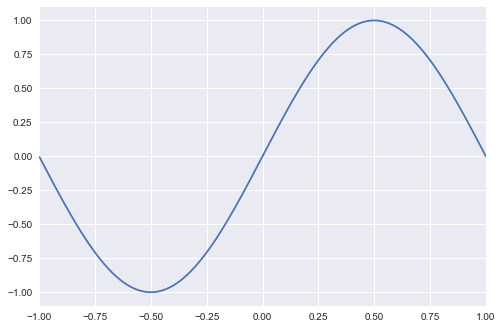

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns

X = np.random.uniform(-1, 1, size=1000)
y = np.sin(np.pi * X)

sns.tsplot(y, X)

And again we compute a function on this sample of data, this time the function is very complex! This is the function that trains on the data, aka the ML alg. We know that if we have a large enough initial sample and we take enough bootstrap samples from our initial sample, we will be able to get a good read on our estimator.

This goes all the way back to the basics of bootstrap that we did in the first lessons of the course! 

This should provide you the intuition for why this works. But let's look at the evidence.

## Bagging evidence

First let's check and make sure that the bias is not too affected:

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingRegressor

biases = []
best_models = {}
for n_estimators in [1, 10, 100]:
    bias_trail = []
    for trail in range(10):
        model_complexity = 2
        X = np.random.uniform(-1, 1, size=10000)
        y = np.sin(np.pi * X)
        poly = PolynomialFeatures(model_complexity)
        X = poly.fit_transform(X[:, None])

        reg = BaggingRegressor(LinearRegression(fit_intercept=False), n_estimators)

        reg.fit(X, y)

        preds = reg.predict(X)

        bias_trail.append([mean_squared_error(preds, y)])
        
    best_models[n_estimators] = reg
    biases.append(bias_trail)


How many models are we training above?

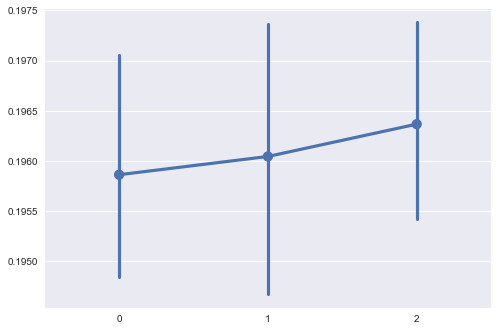

In [18]:
sns.pointplot(data=biases)

And you will notice that for the most part there is no change in the bias, even as we go from 1 to 19 models. Okay, now to the important question, how does bagging change the variance??

In [22]:
X_real = np.random.uniform(-1, 1, size=1000)

model_vars = []
for n_estimators in [1, 10, 100]:
    var = []
    for trail in range(100):
        poly = PolynomialFeatures(2)

        X_real_tran = poly.fit_transform(X_real[:, None])
        y_best = best_models[n_estimators].predict(X_real_tran)
        X = np.random.uniform(-1, 1, size=5)
        y = np.sin(np.pi * X)


        X = poly.fit_transform(X[:, None])

        reg = BaggingRegressor(LinearRegression(fit_intercept=False), n_estimators)

        reg.fit(X, y)

        preds = reg.predict(X_real_tran)

        var.append(mean_squared_error(preds, y_best))

    model_vars.append(var)
        
    

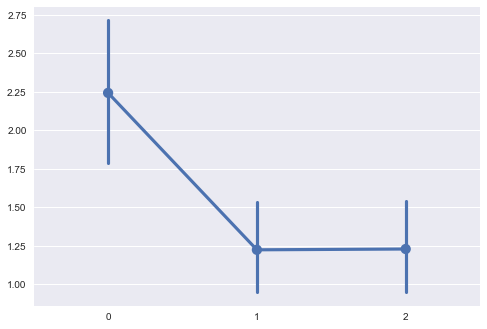

In [24]:
sns.pointplot(data=model_vars)

Notice the massive drop! Going from 1 model to 10 models made a huge difference, in fact most gains were got from the frist three models. That being said you can see how we have reduced our error estimate by a massive margin just by bagging. 

## Learning Objectives

Today we learn about a method of ensemble learning: bagging. We learn:

1. How to use bagging with any model
2. Why bagging works to reduce the variance

## Comprehension Questions

1.	Why does bagging have almost no effect on the bias?
2.	Couldn’t we just train one model multiple times to get the same effect?
3.	Where does the randomness come from in training a model?
4.	Why do we sample with replacement in bagging?
5.	If bagging is bootstrapping, what is the function we are trying to estimate? 
